In [1]:
%matplotlib inline
import obspy
import io
import matplotlib.pyplot as plt
import helpers
import numpy as np
import pandas as pd

from obspy.signal import trigger
from obspy.signal import filter

In [2]:
paths = [
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138', '/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.138',
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.138',
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.138',
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.138',
'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.138'
]
stream_b00 = obspy.read(paths[0])
for p in paths[1:]:
    stream_b00 = stream_b00 + obspy.read(p)

In [3]:
stream_b00

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-18T00:00:02.907000Z - 2019-05-19T00:00:01.019000Z | 1000.0 Hz, 86398113 samples
7F.B00.02.GDH | 2019-05-18T00:00:01.540000Z - 2019-05-19T00:00:00.847000Z | 1000.0 Hz, 86399308 samples
7F.B00.03.GDH | 2019-05-18T00:00:02.689000Z - 2019-05-19T00:00:03.138000Z | 1000.0 Hz, 86400450 samples
7F.B00.04.GDH | 2019-05-18T00:00:02.341000Z - 2019-05-19T00:00:01.086000Z | 1000.0 Hz, 86398746 samples
7F.B00.05.GDH | 2019-05-18T00:00:02.971000Z - 2019-05-19T00:00:01.291000Z | 1000.0 Hz, 86398321 samples
7F.B00.06.GDH | 2019-05-18T00:00:02.192000Z - 2019-05-19T00:00:01.375000Z | 1000.0 Hz, 86399184 samples

In [4]:
# this action destroys the raw data
# the wires were crossed on the hydrophone this fixes it
stream_b00[3].data = stream_b00[3].data.max() - stream_b00[3].data

In [5]:
# this action destroys raw data and only demeaned data is left
stream_b00.detrend('demean')

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-18T00:00:02.907000Z - 2019-05-19T00:00:01.019000Z | 1000.0 Hz, 86398113 samples
7F.B00.02.GDH | 2019-05-18T00:00:01.540000Z - 2019-05-19T00:00:00.847000Z | 1000.0 Hz, 86399308 samples
7F.B00.03.GDH | 2019-05-18T00:00:02.689000Z - 2019-05-19T00:00:03.138000Z | 1000.0 Hz, 86400450 samples
7F.B00.04.GDH | 2019-05-18T00:00:02.341000Z - 2019-05-19T00:00:01.086000Z | 1000.0 Hz, 86398746 samples
7F.B00.05.GDH | 2019-05-18T00:00:02.971000Z - 2019-05-19T00:00:01.291000Z | 1000.0 Hz, 86398321 samples
7F.B00.06.GDH | 2019-05-18T00:00:02.192000Z - 2019-05-19T00:00:01.375000Z | 1000.0 Hz, 86399184 samples

In [6]:
# this action destroys raw data and only normalized data is left
stream_b00.normalize()

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-05-18T00:00:02.907000Z - 2019-05-19T00:00:01.019000Z | 1000.0 Hz, 86398113 samples
7F.B00.02.GDH | 2019-05-18T00:00:01.540000Z - 2019-05-19T00:00:00.847000Z | 1000.0 Hz, 86399308 samples
7F.B00.03.GDH | 2019-05-18T00:00:02.689000Z - 2019-05-19T00:00:03.138000Z | 1000.0 Hz, 86400450 samples
7F.B00.04.GDH | 2019-05-18T00:00:02.341000Z - 2019-05-19T00:00:01.086000Z | 1000.0 Hz, 86398746 samples
7F.B00.05.GDH | 2019-05-18T00:00:02.971000Z - 2019-05-19T00:00:01.291000Z | 1000.0 Hz, 86398321 samples
7F.B00.06.GDH | 2019-05-18T00:00:02.192000Z - 2019-05-19T00:00:01.375000Z | 1000.0 Hz, 86399184 samples

In [7]:
# perform a highpass filter at 5Hz on the data
for t in stream_b00:
    t.data = filter.highpass(t, freq=5, df=1000)

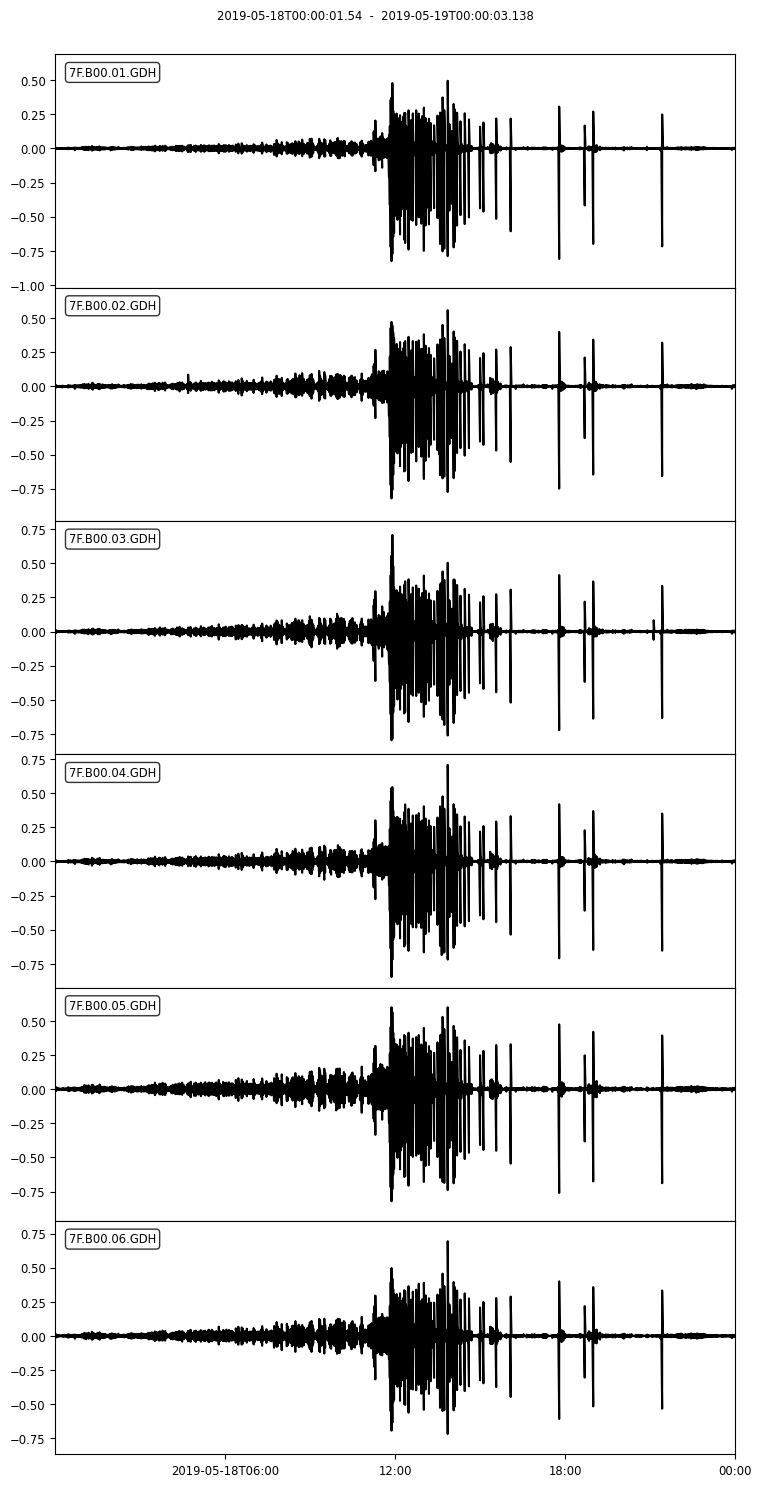

In [8]:
_ = stream_b00.plot()

In [9]:
events = trigger.coincidence_trigger(trigger_type="recstalta"
                                     , thr_on=10 #threshold for switching single station trigger on
                                     , thr_off=1 #threshold for switching single station trigger off
                                     , stream=stream_b00
                                     , thr_coincidence_sum=3 #Threshold for coincidence sum. The network coincidence sum has to be at least equal to this value for a trigger to be included in the returned trigger list.

                                     , sta=0.5
                                     , lta=10)

In [10]:
events = pd.DataFrame(events)

In [11]:
events

,time,stations,trace_ids,coincidence_sum,similarity,duration
0,2019-05-18T06:33:51.115000Z,"[B00, B00, B00, B00, B00]","[7F.B00.05.GDH, 7F.B00.02.GDH, 7F.B00.06.GDH, ...",5.0,{},8.780
1,2019-05-18T06:53:25.595000Z,"[B00, B00, B00, B00, B00, B00]","[7F.B00.01.GDH, 7F.B00.02.GDH, 7F.B00.03.GDH, ...",6.0,{},6.670
2,2019-05-18T07:34:36.619000Z,"[B00, B00, B00, B00, B00]","[7F.B00.01.GDH, 7F.B00.02.GDH, 7F.B00.05.GDH, ...",5.0,{},3.165
3,2019-05-18T10:53:02.898000Z,"[B00, B00, B00, B00, B00]","[7F.B00.02.GDH, 7F.B00.01.GDH, 7F.B00.05.GDH, ...",5.0,{},3.276
4,2019-05-18T11:57:41.532000Z,"[B00, B00, B00, B00, B00, B00]","[7F.B00.01.GDH, 7F.B00.02.GDH, 7F.B00.03.GDH, ...",6.0,{},2.468
...,...,...,...,...,...,...
78,2019-05-18T16:08:51.355000Z,"[B00, B00, B00]","[7F.B00.06.GDH, 7F.B00.04.GDH, 7F.B00.05.GDH]",3.0,{},3.278
79,2019-05-18T17:46:28.290000Z,"[B00, B00, B00, B00, B00, B00]","[7F.B00.01.GDH, 7F.B00.02.GDH, 7F.B00.03.GDH, ...",6.0,{},2.513
80,2019-05-18T18:41:01.550000Z,"[B00, B00, B00, B00, B00, B00]","[7F.B00.01.GDH, 7F.B00.02.GDH, 7F.B00.03.GDH, ...",6.0,{},2.484
81,2019-05-18T18:57:46.199000Z,"[B00, B00, B00, B00, B00, B00]","[7F.B00.01.GDH, 7F.B00.02.GDH, 7F.B00.03.GDH, ...",6.0,{},2.695


Text(0.5, 0, 'duration (s)')

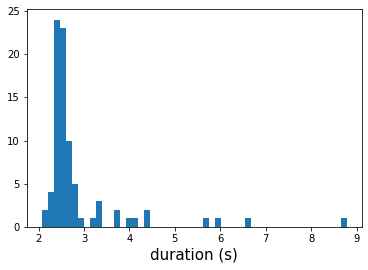

In [26]:
ax = events.duration.hist(bins=51, grid=False)
ax.set_xlabel('duration (s)', fontsize=15)

In [47]:
# fig, ax = plt.subplots(figsize=(10, 15))

event = events.iloc[80]
starttime = obspy.UTCDateTime(event.time) - 1
endtime = obspy.UTCDateTime(event.time) + event.duration + 1
_ = stream_b00.plot(starttime=starttime, endtime=endtime, outfile='test.pdf')

In [49]:
def plot_detection(event, **kwargs):
#     event = events.iloc[80]
    starttime = obspy.UTCDateTime(event.time) - 1
    endtime = obspy.UTCDateTime(event.time) + event.duration + 1
    return stream_b00.plot(starttime=starttime, endtime=endtime, **kwargs)

In [51]:
pwd

'/home/john/research/boreholeSeismology'

In [52]:
for i, e in events.iterrows():
    plot_detection(e, outfile='/home/john/research/boreholeSeismology/detected events/event_'+str(i)+'.pdf')

In [31]:
events

,time,stations,trace_ids,coincidence_sum,similarity,duration
0,2019-05-18T06:33:51.115000Z,"[B00, B00, B00, B00, B00]","[7F.B00.05.GDH, 7F.B00.02.GDH, 7F.B00.06.GDH, ...",5.0,{},8.780
1,2019-05-18T06:53:25.595000Z,"[B00, B00, B00, B00, B00, B00]","[7F.B00.01.GDH, 7F.B00.02.GDH, 7F.B00.03.GDH, ...",6.0,{},6.670
2,2019-05-18T07:34:36.619000Z,"[B00, B00, B00, B00, B00]","[7F.B00.01.GDH, 7F.B00.02.GDH, 7F.B00.05.GDH, ...",5.0,{},3.165
3,2019-05-18T10:53:02.898000Z,"[B00, B00, B00, B00, B00]","[7F.B00.02.GDH, 7F.B00.01.GDH, 7F.B00.05.GDH, ...",5.0,{},3.276
4,2019-05-18T11:57:41.532000Z,"[B00, B00, B00, B00, B00, B00]","[7F.B00.01.GDH, 7F.B00.02.GDH, 7F.B00.03.GDH, ...",6.0,{},2.468
...,...,...,...,...,...,...
78,2019-05-18T16:08:51.355000Z,"[B00, B00, B00]","[7F.B00.06.GDH, 7F.B00.04.GDH, 7F.B00.05.GDH]",3.0,{},3.278
79,2019-05-18T17:46:28.290000Z,"[B00, B00, B00, B00, B00, B00]","[7F.B00.01.GDH, 7F.B00.02.GDH, 7F.B00.03.GDH, ...",6.0,{},2.513
80,2019-05-18T18:41:01.550000Z,"[B00, B00, B00, B00, B00, B00]","[7F.B00.01.GDH, 7F.B00.02.GDH, 7F.B00.03.GDH, ...",6.0,{},2.484
81,2019-05-18T18:57:46.199000Z,"[B00, B00, B00, B00, B00, B00]","[7F.B00.01.GDH, 7F.B00.02.GDH, 7F.B00.03.GDH, ...",6.0,{},2.695


In [14]:
# stream_b00[3].detrend('simple',)
# stream_b00[3].plot()

In [15]:
# stream_b00[3].spectrogram()

In [16]:
# np.mean(stream_b00[0])

In [17]:
# np.mean(stream_b00[1])